<a href="https://colab.research.google.com/github/nalika/NLP/blob/master/Copy_of_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example

    --------

    X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
    X = [[1, 1],
               [1, 2],
               [2, 2],
               [2, 3]]
               
   And the target Y is interpreted as a linear formula of the features of X
   y = C_0 * x_0 + C_1 * x_1 + b
   
y = np.dot(X, np.array([1, 2])) + 3


---



In [0]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


# Data loading

In [0]:
import io

from google.colab import files
uploaded = files.upload()



Saving housing.csv to housing.csv


### Load dataset: Remember the data to sequence arrangement. In this example, we consider the loaded data as already arranged into sequence. **So, can you figure out the the window size that used to to make the sequence?**

---




In [0]:

dataframe = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables


X = dataset[:,0:13] 
Y = dataset[:,13]

In [0]:
X[0,12], Y[0]

(4.98, 24.0)

In [0]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
dataframe.size

7084

# **Train and test dataset split**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train.size, x_test.size

(5915, 663)

# **Training**

In [0]:
model = linear_model.LinearRegression() # # Create linear regression object
model.fit(x_train, y_train)


# Testing

In [0]:
predicted = model.predict(x_test)
print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test, predicted))
print('Variance score: %.2f' % r2_score(y_test, predicted))

Coefficients: 
 [-1.09081768e-01  4.21434664e-02  7.17065798e-03  2.74999578e+00
 -1.84461880e+01  3.80287228e+00 -3.85144429e-03 -1.56617797e+00
  2.86201970e-01 -1.19604292e-02 -9.14818715e-01  7.03031271e-03
 -5.17555027e-01]
Mean squared error: 26.27
Variance score: 0.68


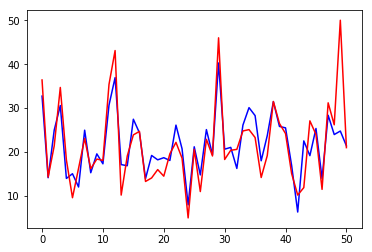

In [0]:
#predicted, y_test

plt.plot(predicted, color='blue')
plt.plot(y_test, color='red')
plt.show()






# Let's do it with Keras

**Develop a Baseline Neural Network Model for the Regression Problem**

In [0]:

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


**Load dataset**

---

**Step 1**- Mount your Google Drive to Collaboratory

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load dataset 

dataframe = pandas.read_csv('gdrive/My Drive/Colab Notebooks/housing.csv', delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [0]:
# Check dataset
print(X.shape, Y.shape)
# Check a random sequence
print(X[10], Y[10])

(506, 13) (506,)
[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.3770e+00
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01] 15.0


In [0]:

# A simple model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	
  # Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


**Note**:  
1. A single densely connected hidden layer with the same number of neurons as input attributes (13). 
2. Rectifier activation function for the hidden layer. 
3. No activation function is used for the output layer because it is a regression problem (predicting numerical values directly without transformation).
4. The ADAM optimizer is used and a mean squared error loss function is optimized. This will be the same metric that we will use to evaluate the performance of the model. 

In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

# get dataset dimension
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 13), (455,), (51, 13), (51,))

**Training**:  Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.

In [0]:
# Train the model, iterating on the data in batches of 5 samples
model = baseline_model()
model.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
455/455 [==============================] - 0s 669us/step - loss: 400.3846
Epoch 2/100
455/455 [==============================] - 0s 261us/step - loss: 118.1711
Epoch 3/100
455/455 [==============================] - 0s 181us/step - loss: 90.7274
Epoch 4/100
455/455 [==============================] - 0s 191us/step - loss: 76.0759
Epoch 5/100
455/455 [==============================] - 0s 203us/step - loss: 70.7809
Epoch 6/100
455/455 [==============================] - 0s 186us/step - loss: 68.2236
Epoch 7/100
455/455 [==============================] - 0s 185us/step - loss: 65.1711
Epoch 8/100
455/455 [==============================] - 0s 184us/step - loss: 63.6135
Epoch 9/100
455/455 [==============================] - 0s 192us/step - loss: 62.0646
Epoch 10/100
455/455 [==============================] - 0s 210us/step - loss: 62.1541
Epoch 11/100
455/455 [==============================] - 0s 192us/step - loss: 59.3111
Epoch 12/100
455/455 [==============================] - 0s 19

In [0]:
score = model.evaluate(x_test, y_test, batch_size=10)
score

51/51 [==============================] - 0s 1ms/step


14.033682823181152

In [0]:
# make a prediction
predicted = model.predict(x_test)
# show the inputs and predicted outputs
for i in range(len(x_test)):
	print("X=%s, Predicted=%s" % (x_test[i, 0:13:2], predicted[i]))

X=[ 3.8497 18.1     0.77   91.     24.     20.2    13.27  ], Predicted=[22.352518]
X=[3.041e-02 5.190e+00 5.150e-01 5.960e+01 5.000e+00 2.020e+01 1.056e+01], Predicted=[22.90668]
X=[ 0.24103  7.38     0.493   43.7      5.      19.6     12.79   ], Predicted=[20.62257]
X=[ 0.62976  8.14     0.538   61.8      4.      21.       8.26   ], Predicted=[22.581987]
X=[ 73.5341  18.1      0.679  100.      24.      20.2     20.62  ], Predicted=[7.1314955]
X=[24.8017 18.1     0.693  96.     24.     20.2    19.77  ], Predicted=[12.241236]
X=[14.3337 18.1     0.614  88.     24.     20.2    13.11  ], Predicted=[18.5482]
X=[ 0.09178  4.05     0.51    84.1      5.      16.6      9.04   ], Predicted=[27.452837]
X=[ 0.03584  3.37     0.398   17.8      4.      16.1      4.67   ], Predicted=[31.712841]
X=[ 3.77498 18.1      0.655   84.7     24.      20.2     17.15   ], Predicted=[14.595091]
X=[ 14.3337  18.1      0.7    100.      24.      20.2     30.62  ], Predicted=[10.786009]
X=[ 0.41238  6.2      0.504 

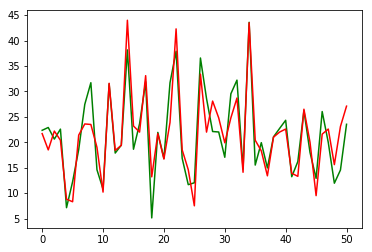

In [0]:
#predicted, y_test

import matplotlib.pyplot as plt

plt.plot(predicted, color='green')
plt.plot(y_test, color='red')
plt.show()